#### 2.2 MIMO Systems

2.2.1 Proof of equivalence  

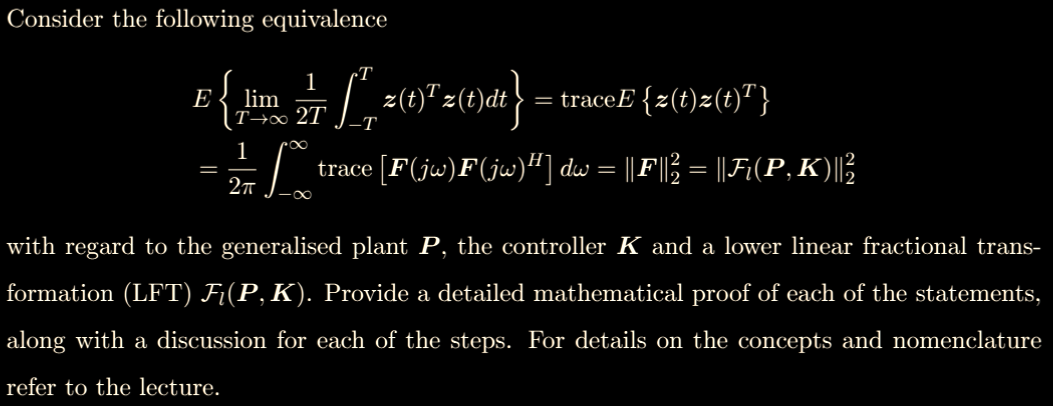

2.2.2 System zero and down squaring  

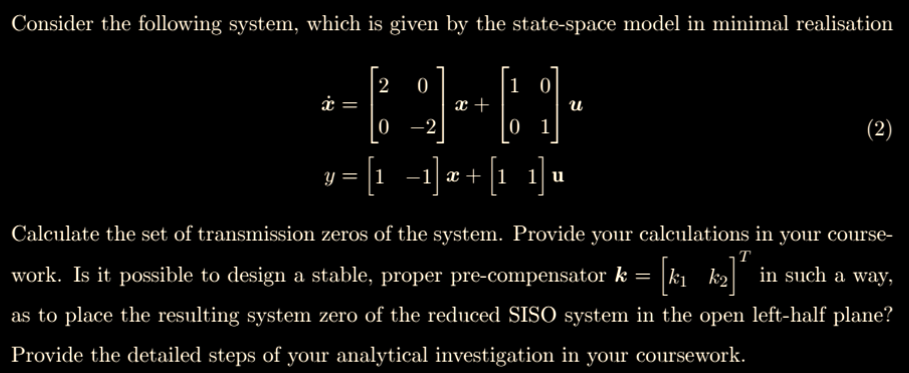

In [1]:
import control as ct
import numpy as np
import scipy as sp
import sympy as sym

In [2]:
# clear all;
# s = tf('s');
# A = [2 0; 0 -2];
# B = [1 0; 0 1];
# C = [1 -1];
# D = [1 1];
# sys = ss(A,B,C,D);

# rewrite in python
A = np.array([[2, 0], [0, -2]])
B = np.array([[1, 0], [0, 1]])
C = np.array([[1, -1]])
D = np.array([[1, 1]])
sys = ct.ss(A, B, C, D)

In [3]:
sys.zeros()
# There are no zeros in this given sys

array([], dtype=float64)

In [4]:
k1 = 1
k2 = 1
K = ct.tf([[[k1]], [[k2]]], [[[1]], [[1]]])

In [5]:
L = sys * K

In [6]:
L.zeros()

array([-1.41421356+0.j,  1.41421356+0.j])

In [7]:
# Find suitable k1 and k2, such that system zero is LHS

2.2.3 Stabilisation via Youla-controller  

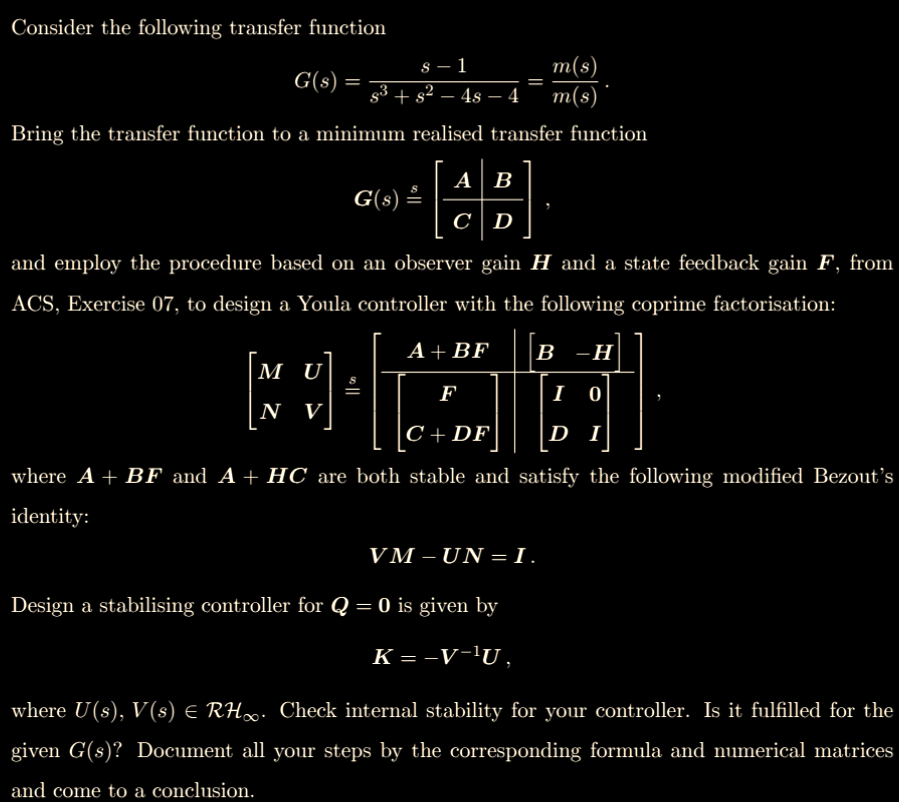

In [8]:
del A, B, C, D, K, L, k1, k2, sys

In [44]:
G = ct.tf([1, -1], [1, 1, -4, -4])

In [45]:
sys = ct.tf2ss(G)
sys = ct.minreal(sys)
A, B, C, D = sys.A, sys.B, sys.C, sys.D

0 states have been removed from the model


In [46]:
D

array([[0.]])

In [47]:
# state-feedback and observer gain matrices
F = -ct.place(A, B, [-4, -2, -1])
H = -ct.place(A.T, C.T, [-4, -2, -1]).T

In [48]:
An = A+B*F

In [49]:
Bn = np.hstack((B, -H))

In [50]:
Cn = np.vstack((F, C+D*F))

In [51]:
Dn = np.array([[1, 0], [D.item(), 1]])

In [71]:
Gcf = ct.tf(ct.ss(An, Bn, Cn, Dn))

In [72]:
M = Gcf[0 ,0]
N = Gcf[1 ,0]
U = Gcf[0 ,1]
V = Gcf[1 ,1]

In [73]:
print(M)

<TransferFunction>: sys[112]$indexed
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  s^3 - 2 s^2
  -----------
  s^3 + 4 s^2


In [76]:
print(ct.tf(ct.minreal(V*M - U*N, tol=1e-3)))

12 states have been removed from the model
<TransferFunction>: sys[127]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  1
  -
  1


In [77]:
K = - ct.minreal ( U / V )
# step ( feedback ( G * K , 1 ) )
# ct.step_response(ct.feedback(G * K , 1) )

3 states have been removed from the model


In [66]:
print(K)

<TransferFunction>: sys[110]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = 1

   432 z^2 + 1296 z + 864
  -------------------------
  z^3 + 13 z^2 + 68 z - 232


In [78]:
L = G*K

In [79]:
ct.poles(G*K)

array([-7.6313298+6.65559981j, -7.6313298-6.65559981j,
        2.2626596+0.j        ,  2.       +0.j        ,
       -2.       +0.j        , -1.       +0.j        ])

In [86]:

ct.feedback(L, 1).dcgain()

-13.500000000001405